In [2]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Click here to update tables + charts:")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

In [3]:
#imports and pull from db
import pandas as pd
import numpy as np
import sqlalchemy as sa
import glob
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.plotly as py
from plotly.graph_objs import *
import datetime
%matplotlib inline  
#%pylab inline
pylab.rcParams['figure.figsize'] = (15, 25)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import qgrid
qgrid.nbinstall(overwrite=True) 

engine = sa.create_engine('mysql+pymysql://root:turnD0wn4wh@t?@localhost/rsi?charset=utf8')
conn = engine.connect()

#cds, cells, exp, fullexp, fullprocess, ivt, ivtdfmod, mods, modtrends, process, sencera, trends, xrf 

senceradf = pd.read_sql('sencera', conn, index_col="sencera_index")
processdf = pd.read_sql("process", conn, index_col="process_index")
expdf = pd.read_sql("exp", conn, index_col="exp_index")
celldf = pd.read_sql("cells", conn, index_col="cells_index")
moddf = pd.read_sql("mods", conn, index_col="mods_index")
trends = pd.read_sql("trends", conn, index_col="trends_index")
xrf = pd.read_sql("xrf", conn, index_col="xrf_index")
ivtdf = pd.read_sql("ivt", conn, index_col="ivt_index")
eddf = pd.read_sql("ed", conn, index_col="ed_index")

import time 
now = time.strftime("%c")
print ("Updated at: %s"  % now )

Updated at: Fri Jun  3 09:43:06 2016


# trend charts

module trends:


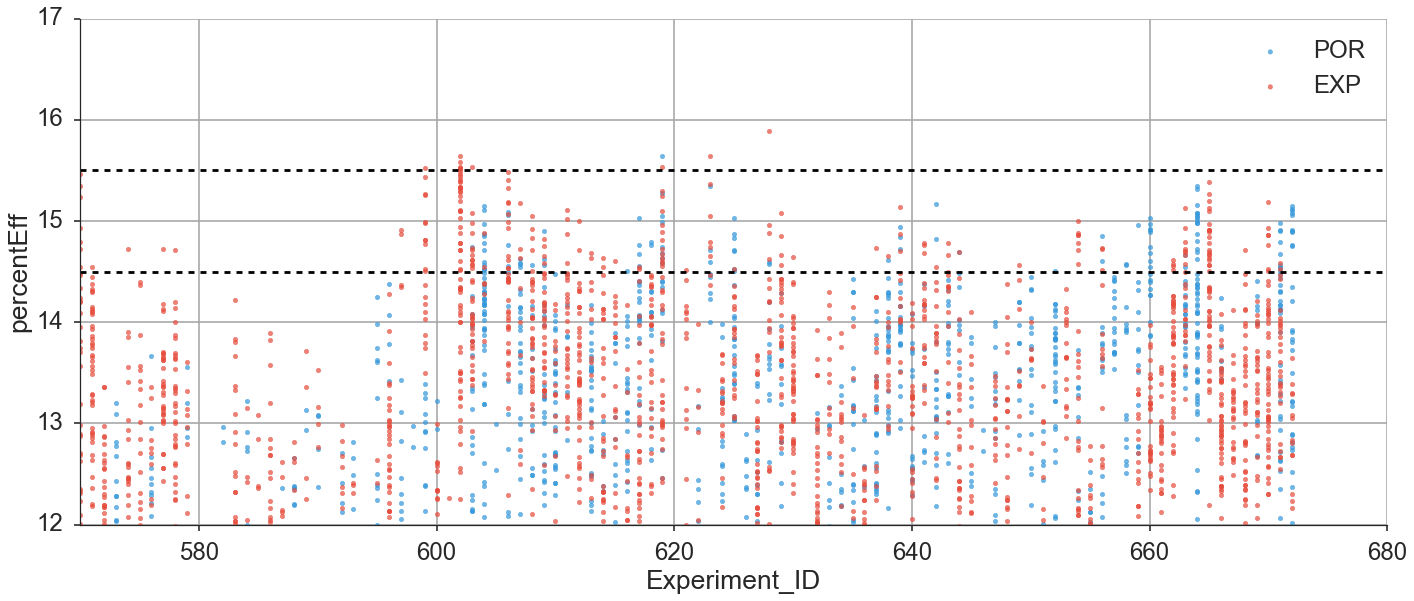

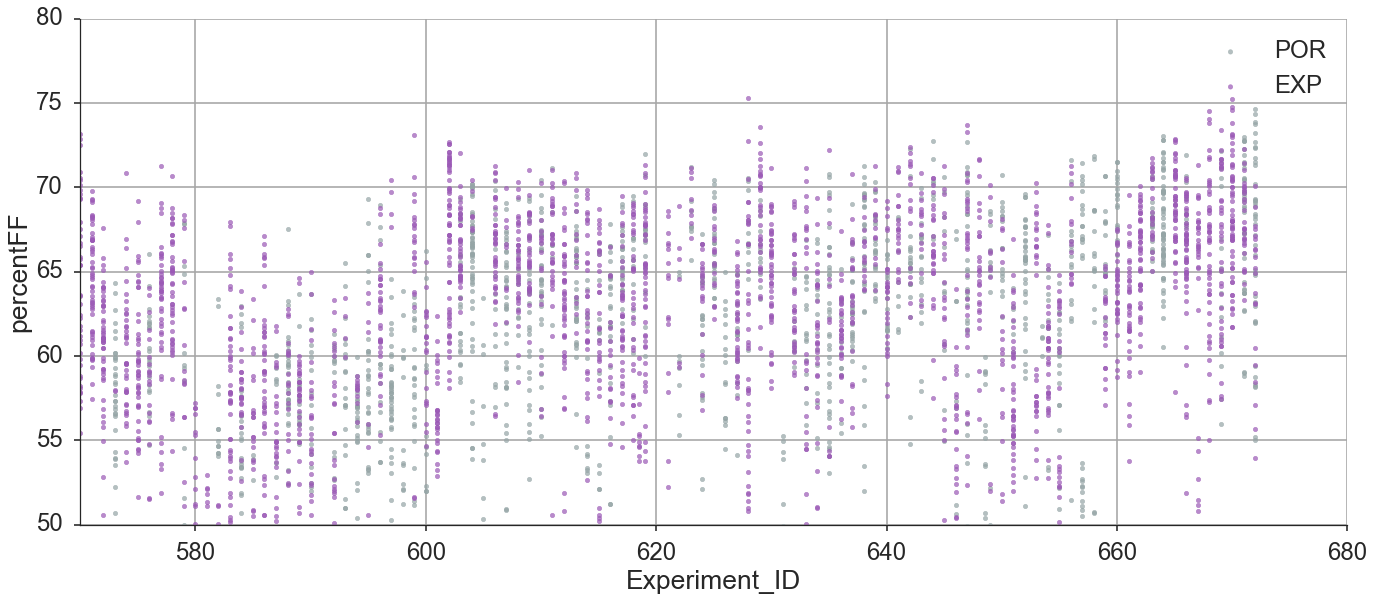

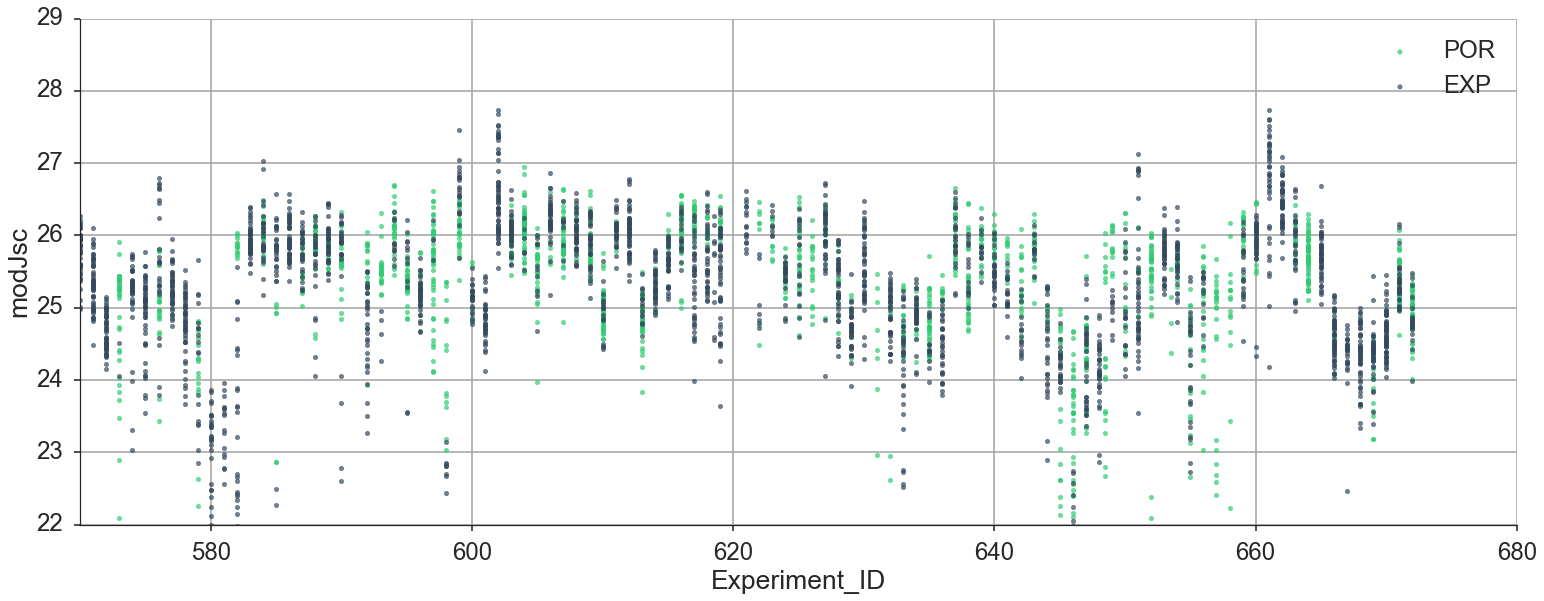

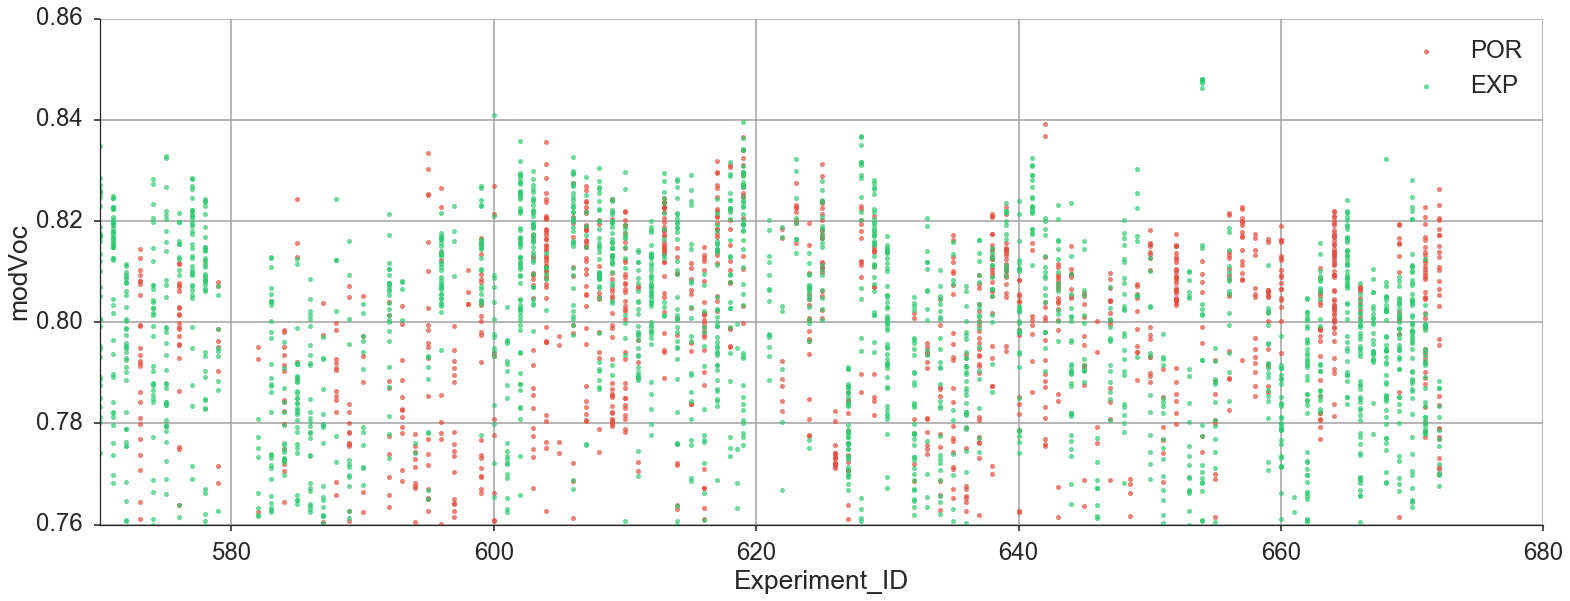

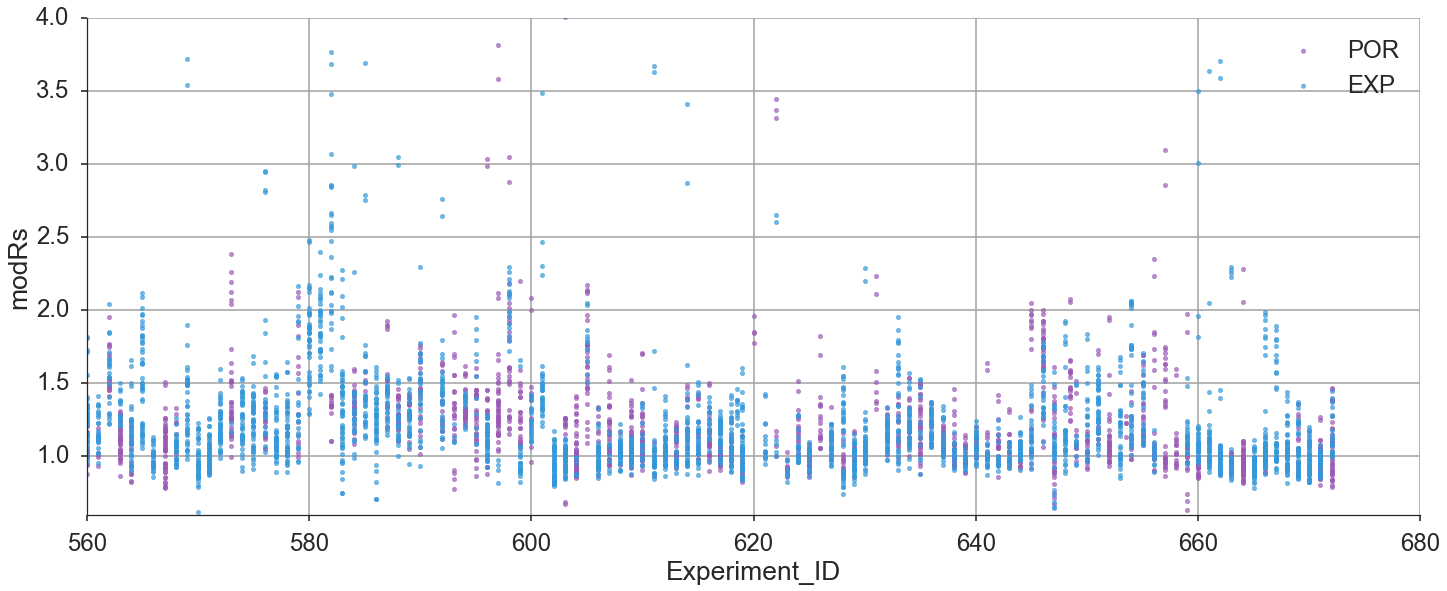

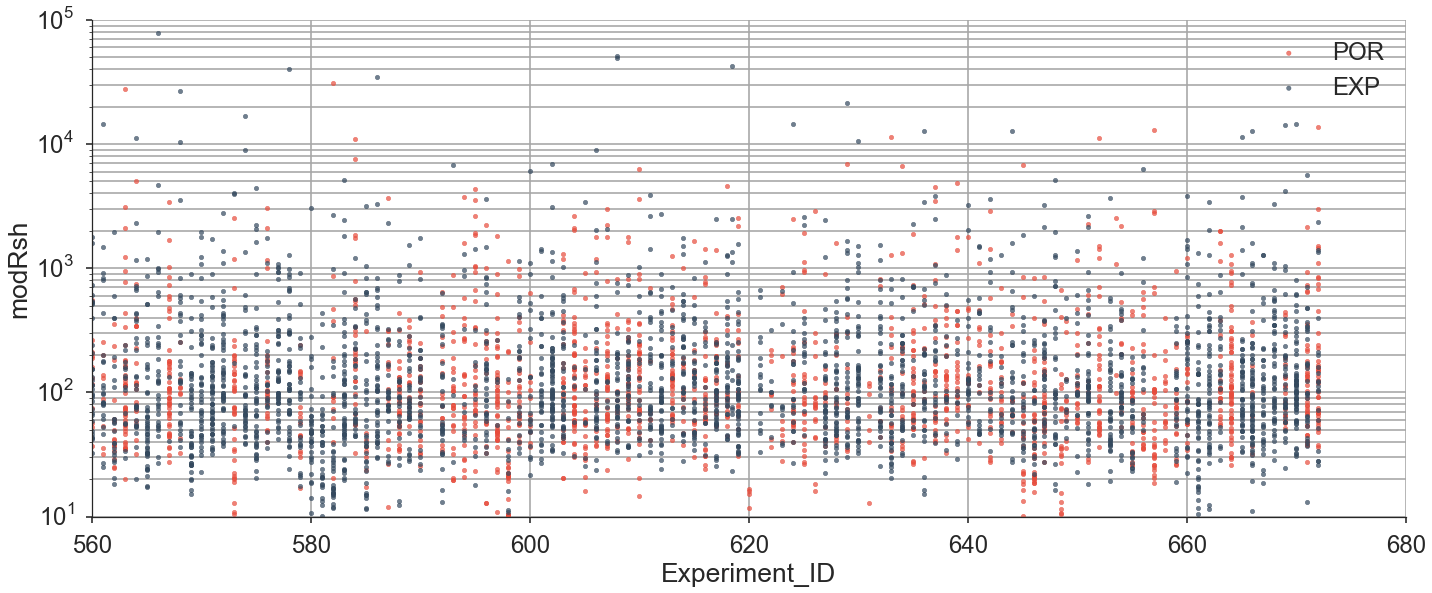

In [4]:
##module eff, FF, Voc, Jsc vs time
print("module trends:")

import seaborn as sns
flatui = ["#3498db", "#e74c3c", "#2ecc71", "#95a5a6", "#34495e", "#9b59b6"]
sns.set(style='ticks')
sns.set_palette(flatui)
sns.set_context("poster", font_scale=1.5,)

fg = sns.FacetGrid(moddf, hue='POR', size= 9, aspect=2.3)#, hue_kws=dict(marker=["^", "v"]))
fg.map(plt.scatter, 'Experiment_ID', 'percentEff', alpha=.7,)
plt.xlim(570,680)
plt.ylim(12, 17)
plt.axhline(15.5, color='k', linestyle='--')
plt.axhline(14.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
#plt.title('mod FOM')
plt.savefig('m_eff.png')

flatui1 = ["#95a5a6", "#9b59b6","#2ecc71", "#34495e", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)

fg1 = sns.FacetGrid(moddf, hue='POR', size= 9, aspect=2.3)
fg1.map(plt.scatter, 'Experiment_ID', 'percentFF', alpha=.7)
plt.xlim(570,680)
plt.ylim(50, 80)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('m_ff.png')

flatui1 = ["#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper
#plt.figure(figsize=(20, 20))

fg2 = sns.FacetGrid(moddf, hue='POR', size=9, aspect=2.5)
fg2.map(plt.scatter, 'Experiment_ID', 'modJsc', alpha=.7,)
plt.xlim(570,680)
#plt.xlim([datetime.date(2015, 12, 5), datetime.date(2016, 5, 25)])
#plt.title("module Jsc")
plt.ylim(22, 29)
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('m_jsc.png')

flatui1 = ["#e74c3c", "#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)

fg21 = sns.FacetGrid(moddf, hue='POR', size= 9, aspect=2.5)
fg21.map(plt.scatter, 'Experiment_ID', 'modVoc', alpha=.7, )
plt.xlim(570,680)
#plt.xlim([datetime.date(2015, 12, 5), datetime.date(2016, 5, 25)])
#plt.title("module Voc")
plt.ylim(.76, .86)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('m_voc.png')

flatui1 = ["#9b59b6","#3498db","#e74c3c", "#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
fg3 = sns.FacetGrid(moddf, hue='POR', size= 9, aspect=2.3)
fg3.map(plt.scatter, 'Experiment_ID', 'modRs', alpha=.7,)
plt.xlim(560,680)
plt.ylim(.6, 4)
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('m_rs.png')

flatui1 = [ "#e74c3c","#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
fg31 = sns.FacetGrid(moddf, hue='POR', size= 9, aspect=2.3)
fg31.map(plt.scatter, 'Experiment_ID', 'modRsh', alpha=.7,)
plt.xlim(560,680)
plt.ylim(1e1, 1e5)
plt.yscale('log')
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('m_rsh.png')

cell trends:


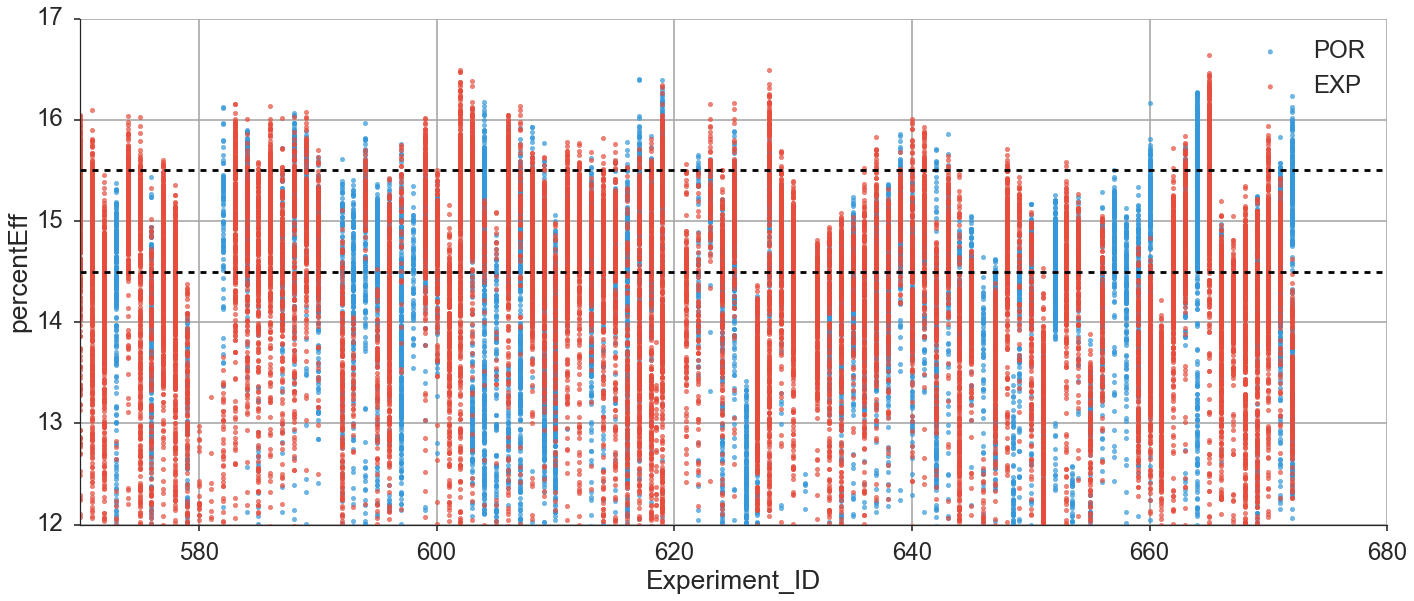

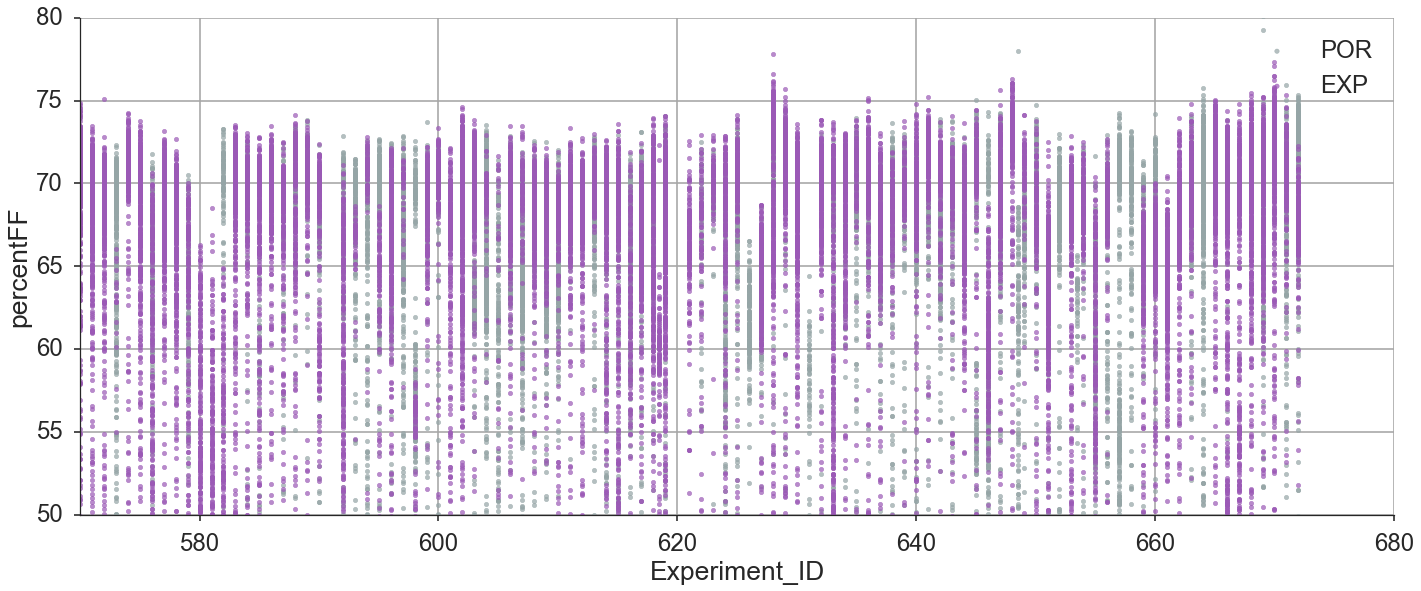

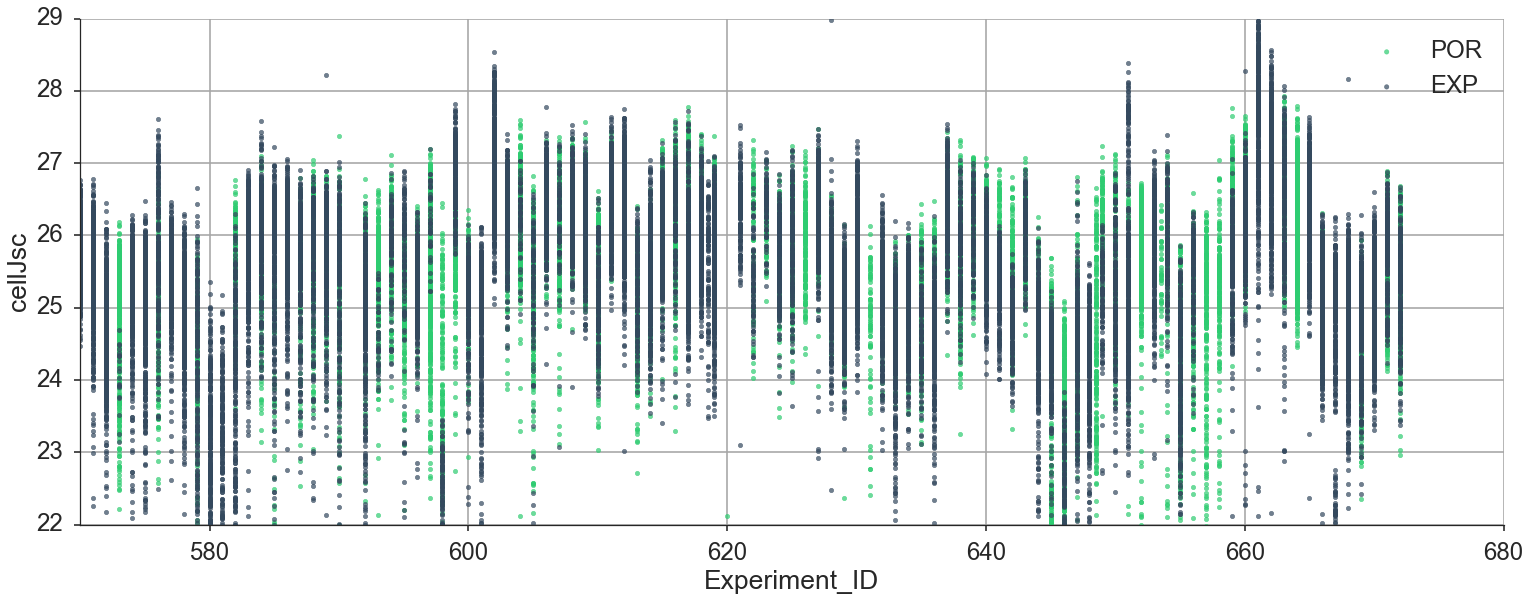

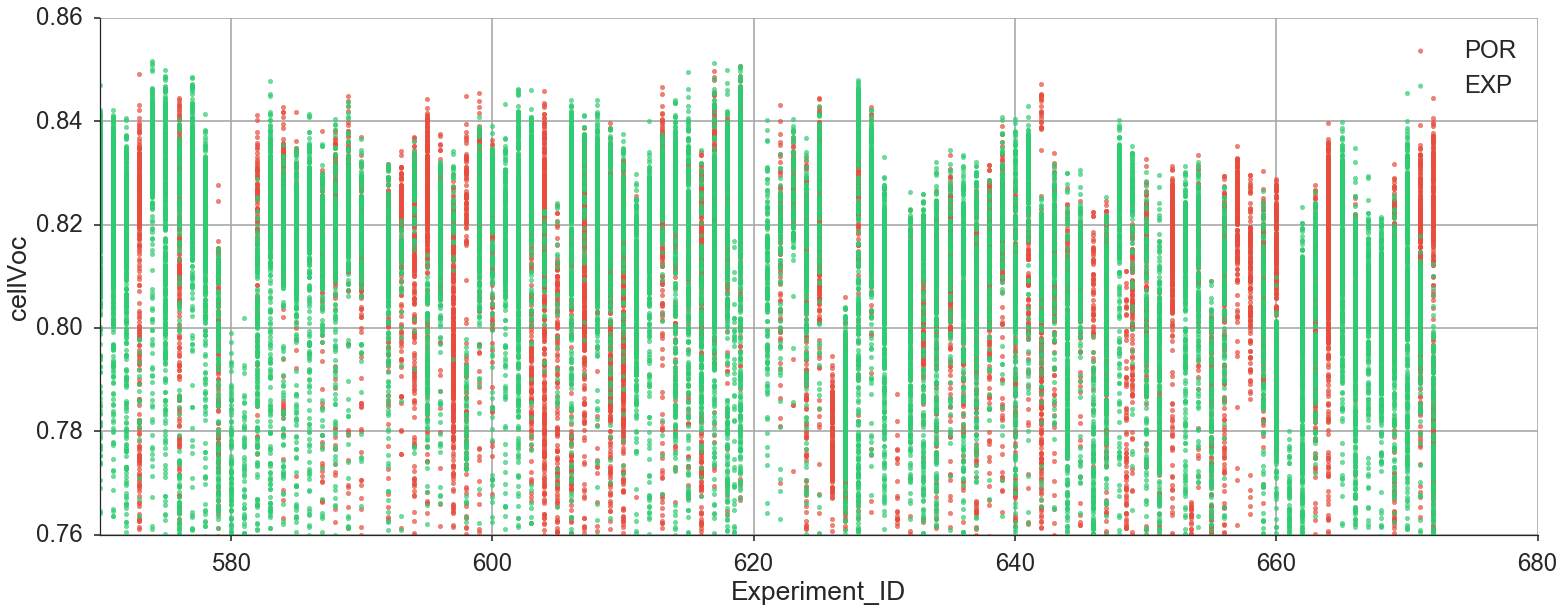

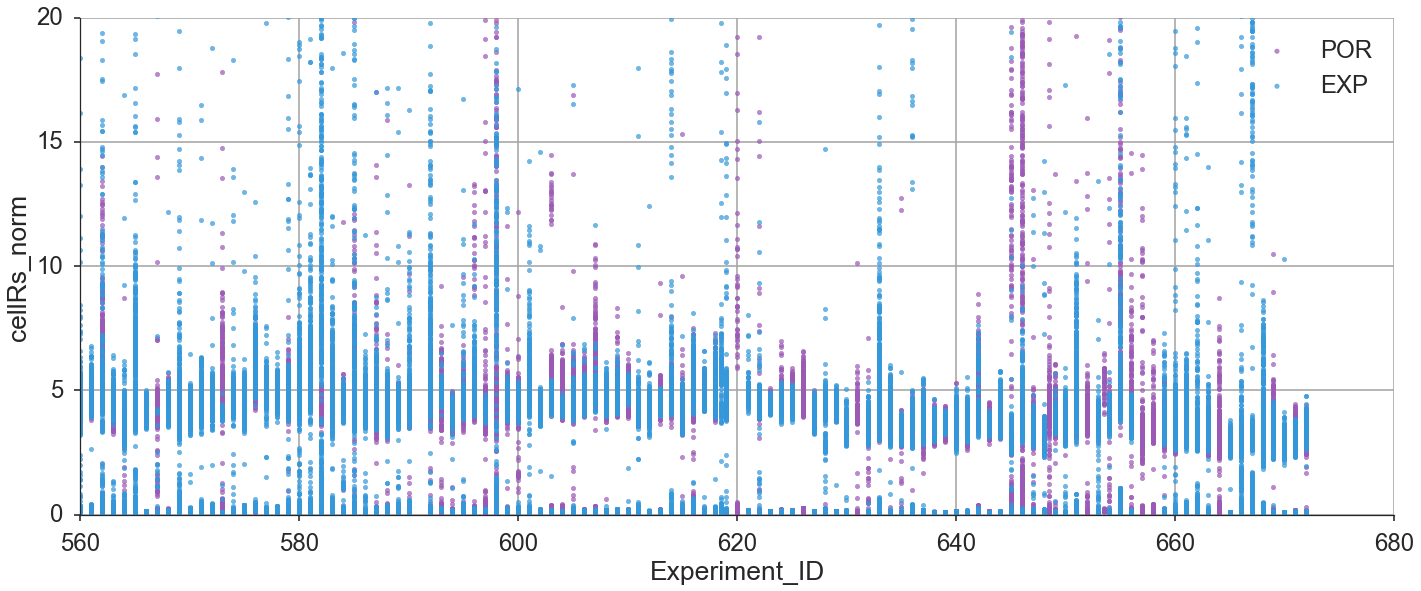

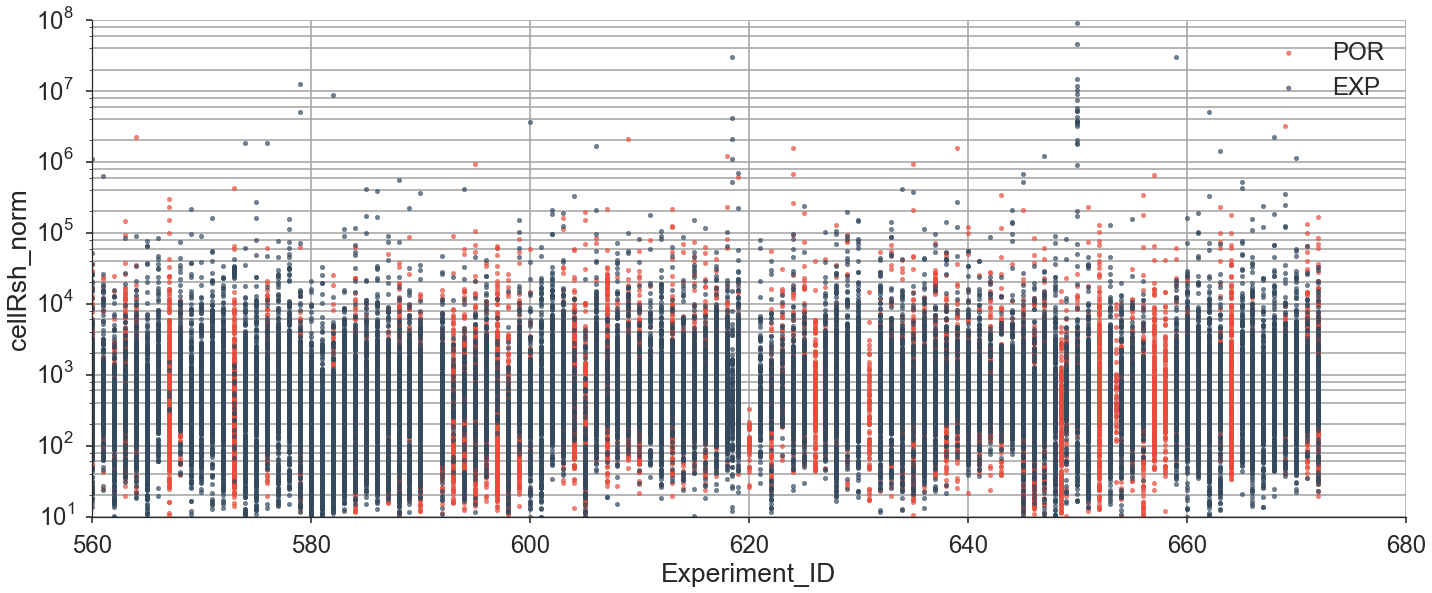

In [5]:
##cells eff, FF, Voc, Jsc vs time
print("cell trends:")
import seaborn as sns
flatui = ["#3498db", "#e74c3c", "#2ecc71", "#95a5a6", "#34495e", "#9b59b6"]
sns.set(style='ticks')
sns.set_palette(flatui)
sns.set_context("poster", font_scale=1.5,)

fg = sns.FacetGrid(celldf, hue='POR', size= 9, aspect=2.3)#, hue_kws=dict(marker=["^", "v"]))
fg.map(plt.scatter, 'Experiment_ID', 'percentEff', alpha=.7,)
plt.xlim(570,680)
plt.ylim(12, 17)
plt.axhline(15.5, color='k', linestyle='--')
plt.axhline(14.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
#plt.title('cell FOM')
plt.savefig('c_eff.png')

flatui1 = ["#95a5a6", "#9b59b6","#2ecc71", "#34495e", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)

fg1 = sns.FacetGrid(celldf, hue='POR', size= 9, aspect=2.3)
fg1.map(plt.scatter, 'Experiment_ID', 'percentFF', alpha=.7)
plt.xlim(570,680)
plt.ylim(50, 80)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('c_ff.png')

flatui1 = ["#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper
#plt.figure(figsize=(20, 20))

fg2 = sns.FacetGrid(celldf, hue='POR', size=9, aspect=2.5)
fg2.map(plt.scatter, 'Experiment_ID', 'cellJsc', alpha=.7,)
plt.xlim(570,680)
#plt.xlim([datetime.date(2015, 12, 5), datetime.date(2016, 5, 25)])
#plt.title("cell Jsc")
plt.ylim(22, 29)
plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('c_jsc.png')

flatui1 = ["#e74c3c", "#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)

fg21 = sns.FacetGrid(celldf, hue='POR', size= 9, aspect=2.5)
fg21.map(plt.scatter, 'Experiment_ID', 'cellVoc', alpha=.7, )
plt.xlim(570,680)
#plt.xlim([datetime.date(2015, 12, 5), datetime.date(2016, 5, 25)])
#plt.title("module Voc")
plt.ylim(.76, .86)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('c_voc.png')

flatui1 = ["#9b59b6","#3498db","#e74c3c", "#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
fg3 = sns.FacetGrid(celldf, hue='POR', size= 9, aspect=2.3)
fg3.map(plt.scatter, 'Experiment_ID', 'cellRs_norm', alpha=.7,)
plt.xlim(560,680)
plt.ylim(0,20.)
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('c_rs.png')

flatui1 = [ "#e74c3c","#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
fg31 = sns.FacetGrid(celldf, hue='POR', size= 9, aspect=2.3)
fg31.map(plt.scatter, 'Experiment_ID', 'cellRsh_norm', alpha=.7,)
plt.xlim(560,680)
plt.ylim(1e1, 1e8)
plt.yscale('log')
#plt.axhline(15.5, color='k', linestyle='--')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('c_rsh.png')

In [ ]:
print("latest 30 experiments, cell eff and ff data:")

flatui = ["#3498db", "#e74c3c", "#2ecc71", "#95a5a6", "#34495e", "#9b59b6"]
sns.set(style='ticks')
sns.set_palette(flatui)
sns.set_context("poster", font_scale=1.5,)
#fig, ax = plt.subplots(figsize=(15, 15))
# the size of A4 paper

# create our boxplot which is drawn on an Axes object
plt.figure(2, figsize=(20,12))
plt.subplot(211)
bplot = sns.boxplot('Experiment_ID', 'percentEff', hue='POR', data=celldf, notch=True)

# We can call all the methods avaiable to Axes objects
#bplot.set_title(title, fontsize=20)
#bplot.set_xlabel('Experiment ID', fontsize=16)
bplot.set_ylabel('cell efficiency [%]', fontsize=16)
bplot.tick_params(axis='y', labelsize=12, which='minor')
bplot.set_ylim(0,20)
bplot.set_xlim(378.5,408.5)
plt.xticks(rotation=30)
plt.legend()
plt.savefig('c_box_eff.png')

plt.subplot(212)
bplot22 = sns.boxplot('Experiment_ID', 'percentFF', data=celldf, hue='POR', notch=True)
bplot22.set_xlabel('Experiment ID', fontsize=16)
bplot22.set_ylabel('cell FF [%]', fontsize=16)
bplot22.tick_params(axis='both', labelsize=12)
bplot22.set_ylim(50,80)
bplot22.set_xlim(378.5,408.5)
plt.savefig('c_box_ff.png')

#sns.despine(left=True) 
plt.xticks(rotation=30)
#plt.legend()
plt.show()



In [ ]:
print("latest 30 experiments, cell jsc and voc data:")
sns.set(style='ticks')
flatui1 = ["#2ecc71", "#34495e", "#95a5a6", "#9b59b6", "#3498db", "#e74c3c",]
sns.set_palette(flatui1)
sns.set_context("poster", font_scale=1.5,)

plt.figure(2, figsize=(20,12))
plt.subplot(211)
bplot21 = sns.boxplot('Experiment_ID', 'cellJsc', hue='POR', data=celldf, notch=True)

#bplot.set_title(title, fontsize=20)
#bplot.set_xlabel('Experiment ID', fontsize=16)
bplot21.set_ylabel('Cell Jsc [$ma/cm^2$]', fontsize=16)
bplot21.tick_params(axis='both', labelsize=12)
bplot21.set_ylim(22,30)
bplot21.set_xlim(355.5,405.5)
plt.xticks(rotation=30)
#bplot.legend()
plt.savefig('c_box_j.png')

plt.subplot(212)
bplot2 = sns.boxplot('Experiment_ID', 'cellVoc', data=celldf, hue='POR', notch=True)
bplot2.set_xlabel('Experiment ID', fontsize=16)
bplot2.set_ylabel('Cell Voc [V]', fontsize=16)
bplot2.tick_params(axis='both', labelsize=12)
bplot2.set_ylim(0.6,0.9)
bplot2.set_xlim(355.5,405.5)
plt.savefig('c_box_v.png')


#sns.despine(left=True) 
plt.xticks(rotation=30)
plt.legend(loc='lower right')
plt.show()

### metrology

In [17]:
cds = pd.DataFrame(trends[trends.Cell_Count >= 22])
cds = cds[~cds['Measurement'].str.contains('.*Dark.*', na = False)]

cds = cds.replace([np.inf, -np.inf], np.nan)

cds = pd.merge(cds, xrf, left_on='Sample ID', right_on='Sample')

cds['CdTe_Tool'] = '1'
mask1 = cds["CdTe 2 Tool"].str.contains('.*TANK.*', na=False)
cds.loc[:,'CdTe_Tool'][mask1] = '2'

print("module trends table:")

module trends table:


c:\anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
qgrid.show_grid(cds, show_toolbar=True, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 150})

In [10]:
print("stats:")
cds.describe()

stats:


,Experiment_ID,CdS Thickness (nm),CdTe Thickness in Angstroms,Cell_Area_mm2,Cell_Count,Cell_no,Eff,Efficiency,FF,FillFactor,I0_nA,Iph_mA,Isc_mA,NumCells,Pmp_fit_ratio,Pmp_mW,R_squared,Roc_Ohm,Rs_Ohm,Rsc_Ohm,Rsh_Ohm,Temp_C,Vmp_V,Voc_V,n,percentEff,percentFF,Voc,Jsc,Rs,Rsh,Unnamed: 0,CdTe_Thickness,CdTe_Density,Cd_Concentration,Cd_Peak,Cd_Background,Te_Concentration,Te_Peak,Te_Background,SnO2_Thickness,SnO2_Density,SnO2_Peak,SnO2_Background,SNR_Cd,SNR_Te,SNR_SnO2
count,8625.000000,8531.000000,7408.000000,8791.000000,8791.000000,8791.000000,0,8791.000000,0,8784.000000,0,0,8791.000000,0,0,8791.000000,0,8.791000e+03,8791.000000,8.791000e+03,8.789000e+03,8791.000000,8791.000000,8784.000000,0,8791.000000,8784.000000,8784.000000,8790.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8789.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000
mean,572.372290,69.068784,20101.164417,565.016449,22.000910,1.998862,NaN,0.116825,NaN,2.338636,NaN,NaN,137.865139,NaN,NaN,1452.392509,NaN,1.137151e+05,40676.693318,1.542215e+05,2.734260e+06,28.235784,12.378801,16.942101,NaN,11.682528,233.863597,0.770062,24.397803,5168.867173,7010.063237,4518.482425,19872.322546,7.276073,51.102389,4063.634740,175.565123,48.908738,3999.135934,265.446821,4351.094381,7.469914,1149.579684,101.400637,0.959482,0.936513,0.919123
std,58.842533,10.235833,4730.223552,7.394333,0.030155,0.033710,NaN,0.026594,NaN,161.985901,NaN,NaN,15.567161,NaN,NaN,330.764885,NaN,7.837842e+06,1346914.920039,8.738834e+06,2.385675e+08,2.015741,1.958370,1.823880,NaN,2.659362,16198.590065,0.082877,2.753232,356265.538929,397219.724361,1343.826664,3464.683013,0.032841,1.271837,611.441782,120.987322,1.036179,574.217739,119.841025,766.050398,0.552770,50.378863,30.289151,0.030437,0.034582,0.027105
min,467.000000,11.000000,1452.000000,0.000000,22.000000,1.000000,NaN,0.000000,NaN,0.087460,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,9.590290e-01,0.954137,1.665353e+00,6.095970e-01,22.406696,0.000000,0.032261,NaN,0.000000,8.746000,0.001466,0.000000,0.043592,0.075698,2250.000000,52.200000,6.887000,33.700000,12.000000,27.000000,25.100000,0.000000,108.000000,0.000000,7.300000,0.000000,54.000000,0.083922,0.000000,0.000000
25%,522.000000,61.000000,15871.000000,565.000000,22.000000,2.000000,NaN,0.109046,NaN,0.578125,NaN,NaN,135.978709,NaN,NaN,1355.235691,NaN,2.191802e+01,15.612176,1.110425e+03,1.868420e+03,26.631349,11.806377,16.897499,NaN,10.904600,57.812525,0.768068,24.045636,0.996274,50.473869,3364.000000,15653.000000,7.266000,50.700000,3376.000000,85.000000,48.700000,3351.000000,200.000000,3466.600000,7.300000,1125.000000,83.000000,0.944327,0.926145,0.910424
50%,573.000000,69.000000,21497.000000,565.000000,22.000000,2.000000,NaN,0.123980,NaN,0.629036,NaN,NaN,140.478593,NaN,NaN,1541.097392,NaN,2.457826e+01,17.910511,2.000999e+03,3.295951e+03,28.062357,12.926776,17.513635,NaN,12.398000,62.903550,0.796074,24.856465,1.117194,90.954497,4445.000000,21408.700000,7.274000,51.000000,4301.000000,127.000000,49.000000,4222.000000,243.000000,4846.400000,7.300000,1152.000000,92.000000,0.968148,0.937050,0.925421
75%,622.000000,72.000000,22456.000000,565.000000,22.000000,2.000000,NaN,0.133834,NaN,0.665850,NaN,NaN,144.895775,NaN,NaN,1664.275148,NaN,2.883159e+01,20.748376,4.341636e+03,6.899121e+03,29.979475,13.611598,17.817054,NaN,13.383400,66.585000,0.809864,25.649557,1.310527,197.347101,5688.000000,22386.900000,7.281000,51.300000,4486.000000,255.000000,49.300000,4405.000000,318.000000,4996.200000,7.300000,1172.000000,115.000000,0.977563,0.954113,0.932189
max,672.000000,112.000000,224018.000000,575.000000,23.000000,2.000000,NaN,0.164577,NaN,15182.410604,NaN,NaN,171.986190,NaN,NaN,2045.689848,NaN,7.277880e+08,71926771.933288,7.844196e+08,2.235724e+10,41.478232,18.102726,20.809271,NaN,16.457700,1518241.060400,0.945876,30.440034,33081270.805875,35655437.861323,6915.000000,32589.600000,8.650000,100.000000,9562.000000,2228.00

In [11]:
# exports full trends df to excel
from xlsxwriter.utility import xl_rowcol_to_cell
writer_orig = pd.ExcelWriter('db.xlsx', engine='xlsxwriter')
%time cds.to_excel(writer_orig, index=False, sheet_name='all')
writer_orig.save()
print('Exported to db.xlsx.')

Wall time: 26.5 s
Exported to db.xlsx.


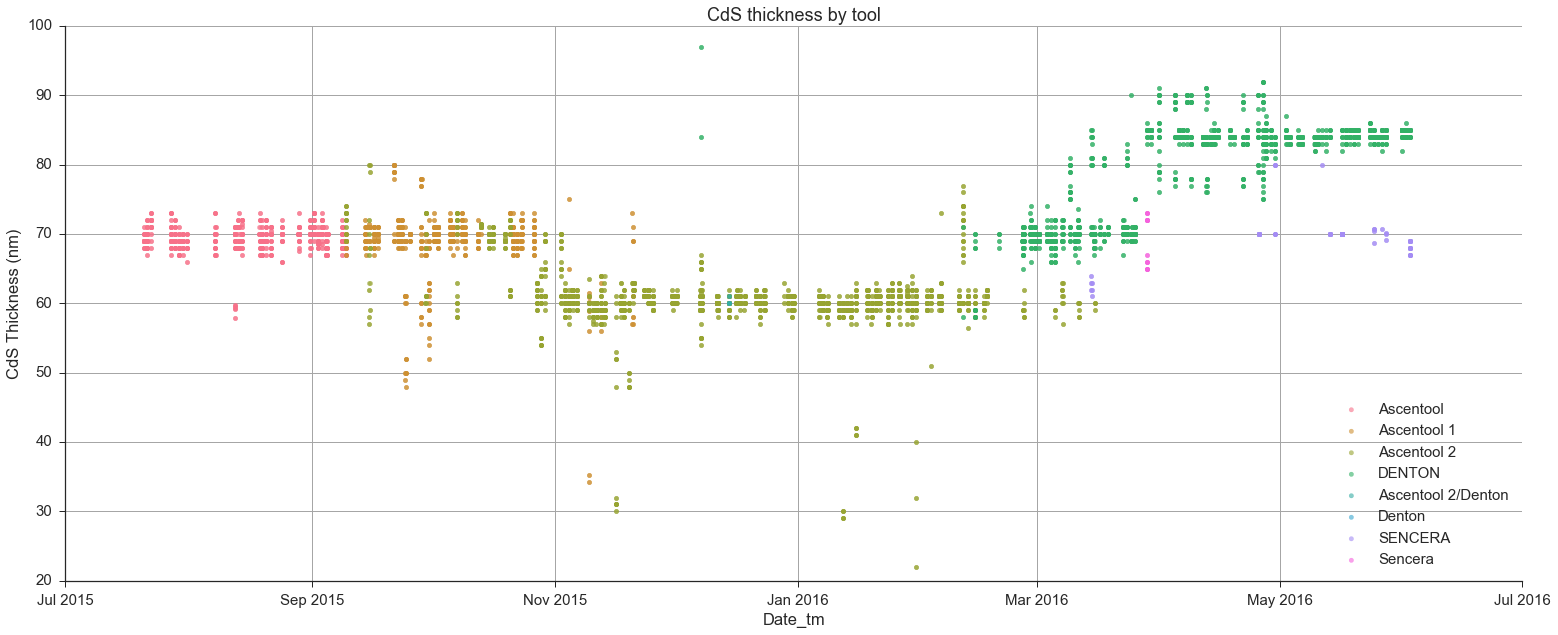

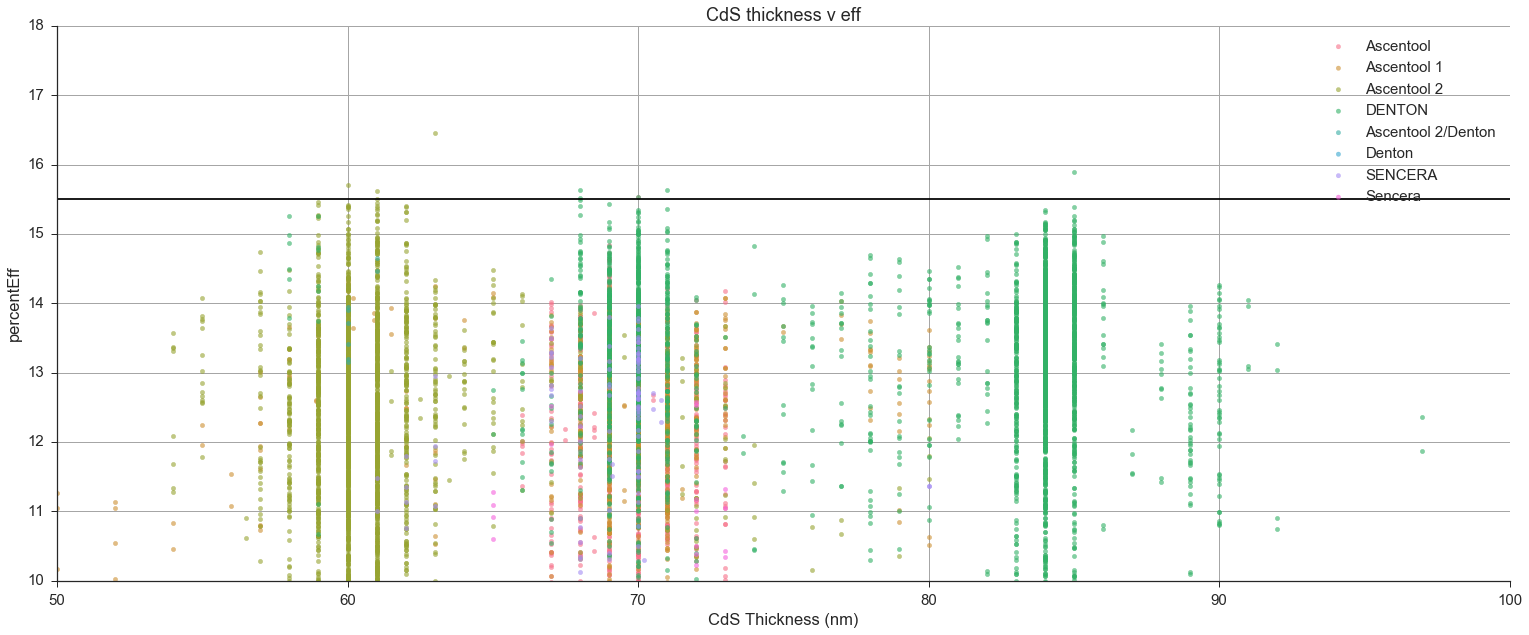

In [12]:
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.5,)
fg = sns.FacetGrid(cds, hue='CdS Tool', size= 9, aspect=2.4)#, col='CdS Tool')
fg.map(plt.scatter, 'Date_tm', 'CdS Thickness (nm)', alpha=.6,)
#plt.xlim(550,650)
plt.xlim([datetime.date(2015, 7, 1), datetime.date(2016, 7, 1)])
plt.ylim(20, 100)
#plt.axhline(15.5, color='k', linestyle='-')
plt.title("CdS thickness by tool")
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc="lower right")
plt.savefig('cds_thickvtime.png')


sns.set_palette("bright")
fg1 = sns.FacetGrid(cds, hue='CdS Tool', size= 9, aspect=2.4)#, col='CdS Tool')
fg1.map(plt.scatter, 'CdS Thickness (nm)', 'percentEff',alpha=.6,)
plt.xlim(50,100)
#plt.xlim([datetime.date(2015, 7, 1), datetime.date(2016, 7, 1)])
plt.ylim(10, 18)
plt.axhline(15.5, color='k', linestyle='-')
plt.title("CdS thickness v eff")
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('cds_thickveff.png')

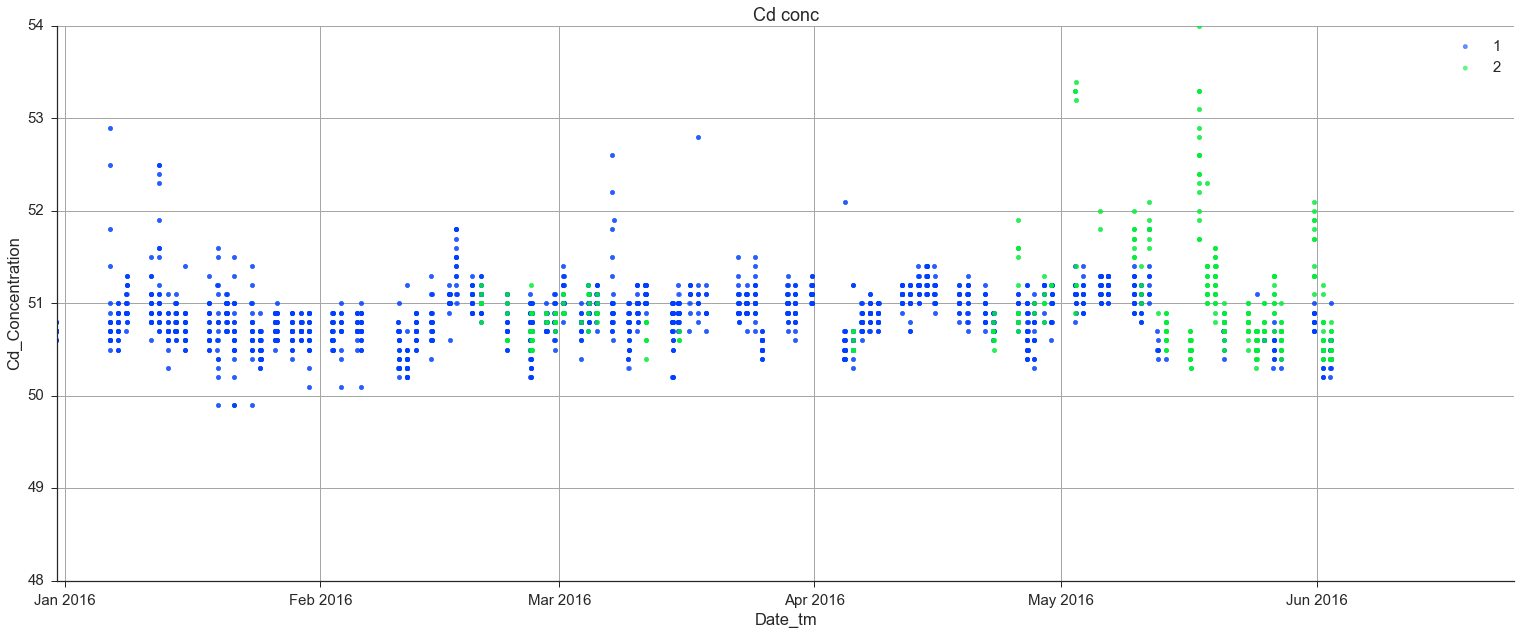

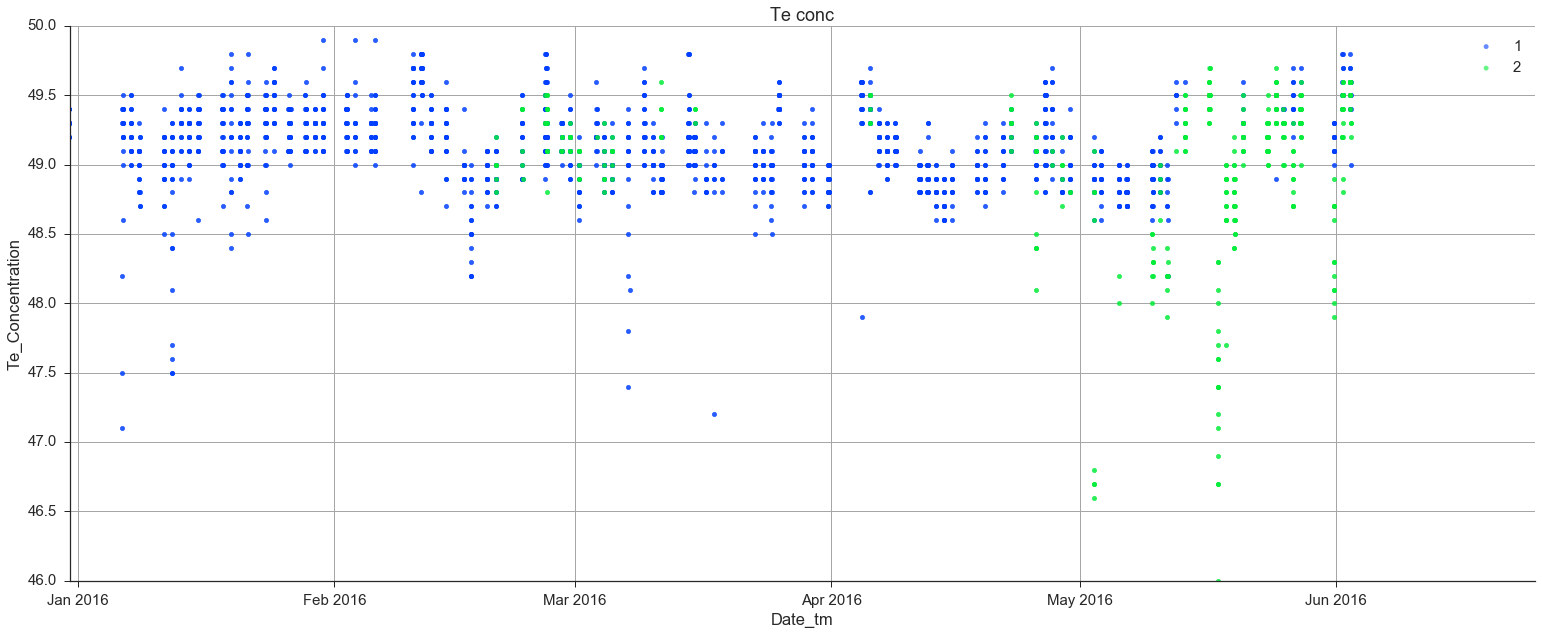

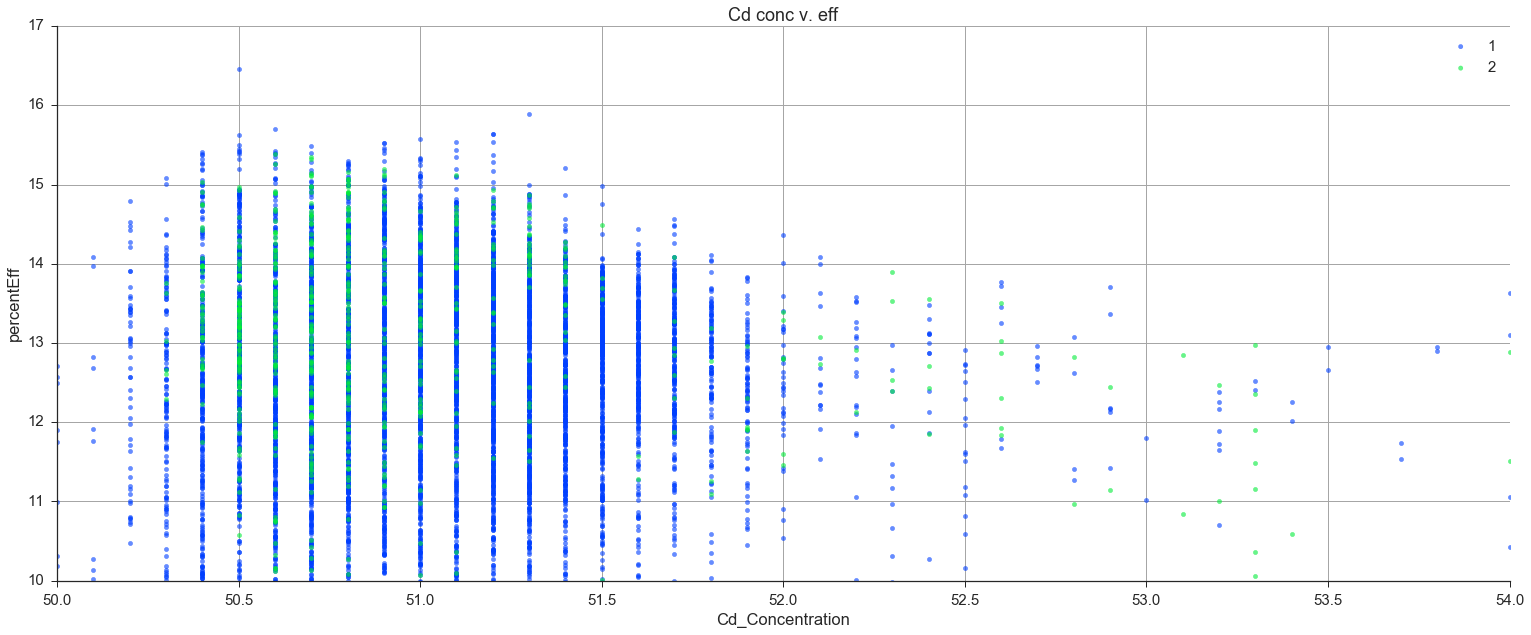

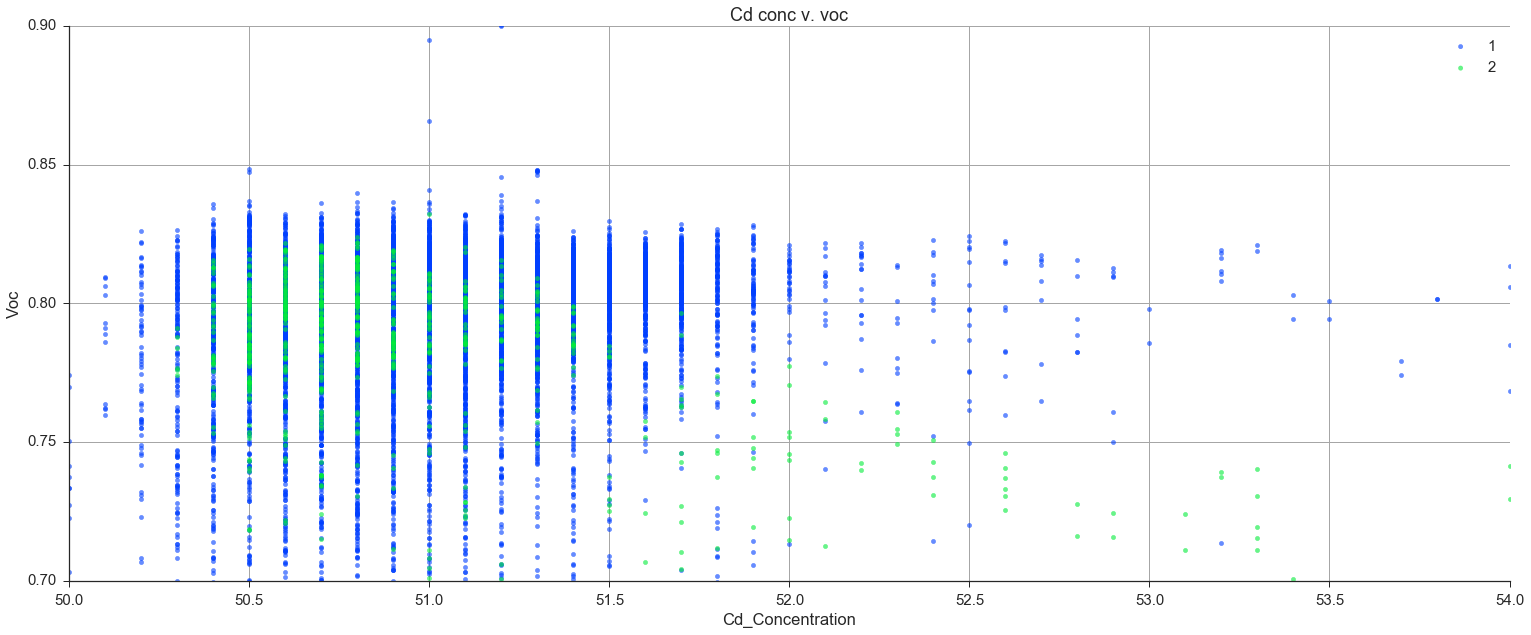

In [13]:
fg = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg.map(plt.scatter,'Date_tm','Cd_Concentration', alpha=.6,)
#plt.xlim(50,54)
plt.xlim([datetime.date(2015, 12, 31), datetime.date(2016, 6, 25)])
plt.ylim(48, 54)
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.title("Cd conc")
plt.legend()
plt.savefig('cdte_cdvtime.png')

fg2 = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg2.map(plt.scatter,'Date_tm','Te_Concentration', alpha=.6,)
#plt.xlim(50,54)
plt.xlim([datetime.date(2015, 12, 31), datetime.date(2016, 6, 25)])
plt.ylim(46, 50)
plt.title("Te conc")
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('cdte_teveff.png')

fg1 = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg1.map(plt.scatter,'Cd_Concentration','percentEff', alpha=.6,)
plt.xlim(50,54)
plt.ylim(10, 17)
plt.title("Cd conc v. eff")
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('cdte_cdveff.png')

fg4 = sns.FacetGrid(cds, size= 9, aspect=2.4, hue='CdTe_Tool') #col='CdS Tool'
fg4.map(plt.scatter,'Cd_Concentration','Voc', alpha=.6,)
plt.xlim(50,54)
plt.ylim(0.7, 0.9)
plt.title("Cd conc v. voc")
#plt.axhline(15.5, color='k', linestyle='-')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend()
plt.savefig('cdte_cdvvoc.png')

### stats:

In [14]:
cells = celldf.drop(['Eff', 'NumCells', 'FF', 'I0_nA', 'n', 'Pmp_fit_ratio'], axis=1)
cells = cells[~cells['Measurement'].str.contains('.*Dark.*', na = False)]
cells.head()


mods = moddf.drop(['Eff', 'NumCells', 'FF', 'I0_nA', 'n', 'Pmp_fit_ratio'], axis=1)
mods = mods[~mods['Measurement'].str.contains('.*Dark.*', na = False)]
mods.head()


groupmoddf = mods.groupby('Experiment_ID', as_index=False)
modmedian = groupmoddf.median()
modmean = groupmoddf.mean()


groupcelldf = cells.groupby('Experiment_ID', as_index=False)
cellmedian = groupcelldf.median()
cellmean = groupcelldf.mean()

qgrid.show_grid(cellmedian, show_toolbar=True, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

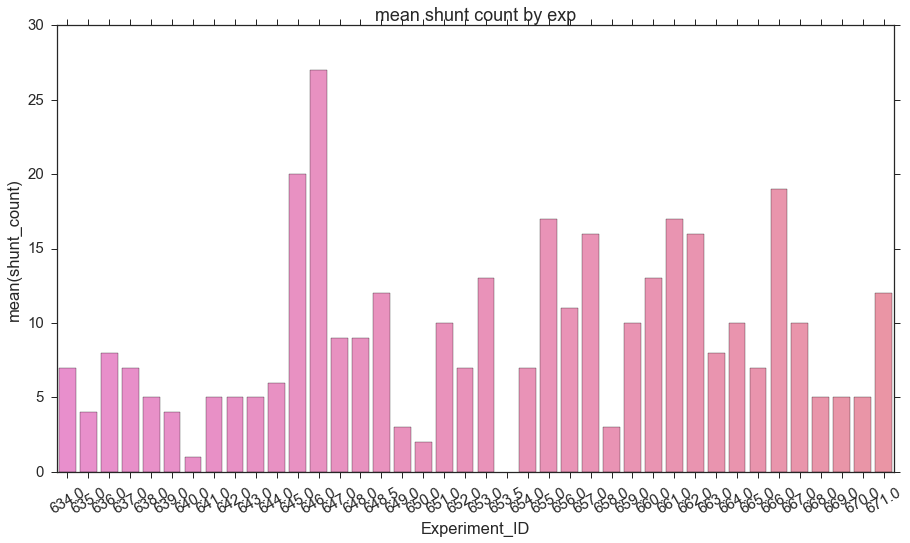

In [15]:
b = pd.DataFrame(moddf.groupby(['Experiment_ID'], as_index=False)['shunt_count'].sum())

b.sort_values(by='Experiment_ID')
b.head()
plt.figure(figsize=(15, 8))

sns.barplot(x='Experiment_ID', y='shunt_count', data=b)
plt.xlim(367.5, 407.5)
plt.ylim(0,30)
plt.title("mean shunt count by exp")
plt.xticks(rotation=30)